# Iman Noor
## ByteWise Fellow

# 📚🏫 **University Enrollment (Mini Project 01)** 📝📊

## Introduction

The project focuses on analyzing university enrollment data to understand trends and factors influencing student enrollment in courses offered by different departments.

## Problem Definition

Can we predict the enrollment trends based on various course attributes such as type, year, prerequisites, and department?

## Features

- **course_id**: Unique identifier for each course
- **course_type**: Type of course (classroom or online)
- **year**: Year in which the course was offered
- **enrollment_count**: Number of students enrolled in the course
- **pre_score**: Pre-course assessment score
- **post_score**: Post-course assessment score
- **pre_requirement**: Prerequisites for the course (if any)
- **department**: Department offering the course

## Data Exploration and Analysis

- **Overview**: Explore the dataset to understand its structure and characteristics.
- **Enrollment Trends**: Analyze enrollment trends over the years and across different departments.
- **Impact of Course Type**: Investigate whether course type (classroom or online) affects enrollment numbers.
- **Correlation Analysis**: Determine correlations between enrollment count and other features such as pre/post scores or prerequisites.

## Data Visualization

- **Bar Charts**: Visualize enrollment counts by department and course type.
- **Line Plot**: Show trends in enrollment over the years.
- **Correlation Heatmap**: Display correlations between numerical features.

## Preparing the tools

In [1]:
# Importing all the tools
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Magic function so that the plots appear inside notebook
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('university_enrollment_(Mini-project-01).csv')
df.shape

(1850, 8)

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [4]:
df.tail()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math
1849,1850,online,2017,256,17.57,72.0,None,Math


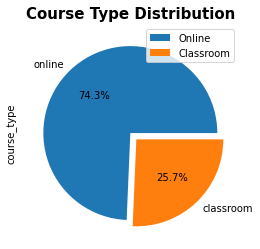

In [5]:
df['course_type'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.1])
plt.legend(['Online', 'Classroom'])
plt.title('Course Type Distribution', weight='bold', fontsize=15)
plt.show();

In [6]:
# Checking missing values
df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [8]:
# Converting 'pre_score' column to float, coercing errors to NaN
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')

# Replacing Null entries with the mean 
df['pre_score'] = df['pre_score'].fillna(df['pre_score'].mean())
df['post_score'] = df['post_score'].fillna(df['post_score'].mean())

In [9]:
df.isna().sum()

course_id            0
course_type          0
year                 0
enrollment_count     0
pre_score            0
post_score           0
pre_requirement     89
department           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB


In [11]:
# Replacing 'NA' strings with actual NaN values
df['pre_requirement'] = df['pre_requirement'].replace('NA', pd.NA)

none_indices = df[df['pre_requirement'] == 'None'].index # Finding index with 'None'
half = len(none_indices) // 2  # Number of replacements for each category
shuffled_indices = np.random.permutation(none_indices) # Shuffling the indices for randomness

# Replacing half with 'Beginner' and half with 'Intermediate'
df.loc[shuffled_indices[:half], 'pre_requirement'] = 'Beginner'
df.loc[shuffled_indices[half:], 'pre_requirement'] = 'Intermediate'

# Droping rows where 'pre_requirement' is NaN or None
df = df.dropna(subset=['pre_requirement'])

In [12]:
df.isna().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [13]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,Beginner,Science
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.10,76.0,Beginner,Math
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,Beginner,Technology
1847,1848,online,2011,257,76.00,81.0,Intermediate,Mathematics
1848,1849,online,2013,256,20.67,66.0,Intermediate,Math


In [14]:
df.describe()

,course_id,year,enrollment_count,pre_score,post_score
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,923.994889,2016.386712,230.740488,49.566392,75.282936
std,534.347474,3.438721,37.250018,27.852884,8.097013
min,1.000000,2011.000000,154.000000,1.020000,53.000000
25%,464.000000,2013.000000,185.000000,26.310000,70.000000
50%,923.000000,2016.000000,251.000000,49.527320,75.204805
75%,1384.000000,2019.000000,257.000000,72.580000,80.000000
max,1850.000000,2022.000000,267.000000,99.970000,105.000000


## Data Visualization

In [15]:
df.columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department'],
      dtype='object')

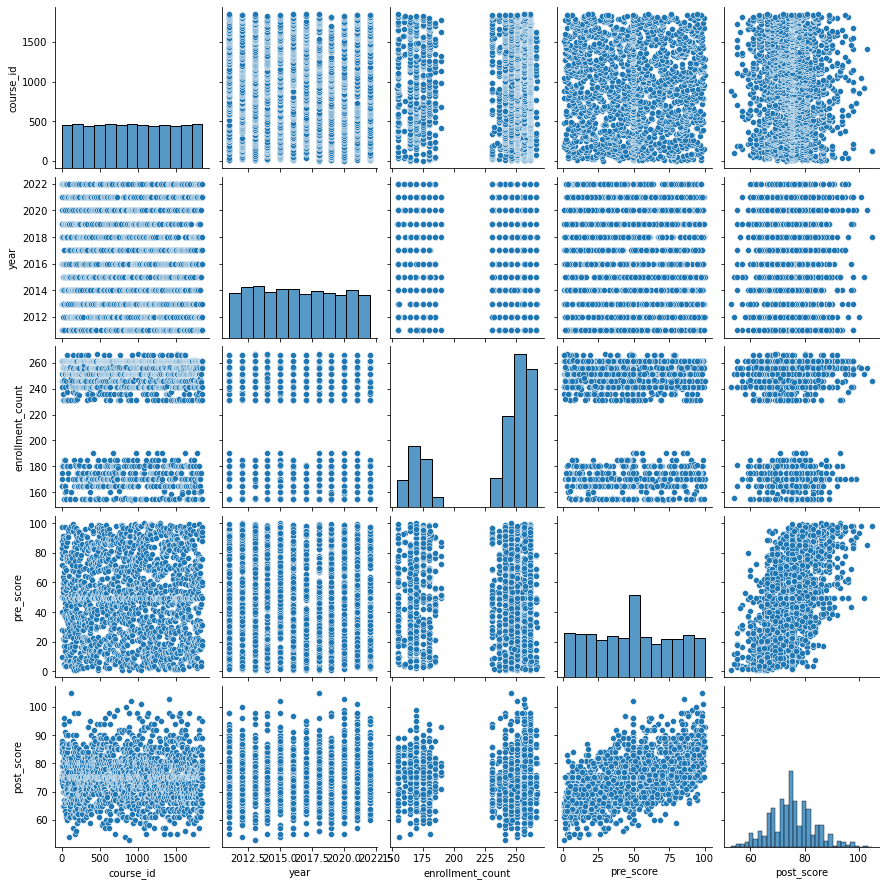

In [16]:
sns.pairplot(df);

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('seaborn-colorblind')

### Q. What insights can be drawn from the pie chart depicting the distribution of pre-requirements (categorized as 'Beginner' and 'Intermediate') among students?

## Pre Requirement Distribution

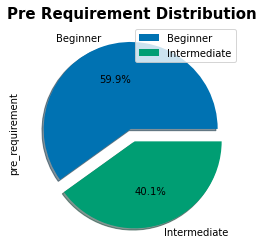

In [19]:
df['pre_requirement'].value_counts().plot.pie(shadow=True, autopct='%2.1f%%',explode=[0.05, 0.1])
plt.legend(['Beginner', 'Intermediate'])
plt.title('Pre Requirement Distribution', weight='bold', fontsize=15)
plt.show();

## Score Analysis: Pre and Post Scores

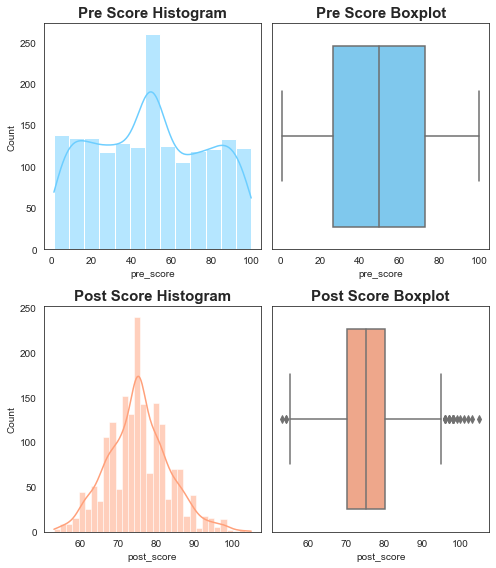

In [20]:
plt.figure(figsize=(7, 8))
sns.set_style("white")
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='pre_score', color='#6DCEFF', kde=True)
plt.title('Pre Score Histogram', weight='bold', fontsize=15)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='pre_score', color='#6DCEFF')
plt.title('Pre Score Boxplot', weight='bold', fontsize=15)

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='post_score', color='#FFA07A', kde=True)
plt.title('Post Score Histogram', weight='bold', fontsize=15)

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='post_score', color='#FFA07A')
plt.title('Post Score Boxplot', weight='bold', fontsize=15)

plt.tight_layout()
plt.show()

## Score Analysis: Pre and Post Scores

### Pre Score Histogram and Boxplot:
- **Histogram (Pre Score)**:
  - It indicates that the majority of students fall within a certain range of pre scores, with a slight skewness towards higher or lower scores, as observed from the shape of the distribution.
  
- **Boxplot (Pre Score)**:
  - It displays key statistical measures such as the median (line inside the box), interquartile range (box), and outliers (points outside the whiskers).
  - From the boxplot, the central tendency and spread of pre scores, as well as any potential outliers that may significantly differ from the majority can be identified.

### Post Score Histogram and Boxplot:
- **Histogram (Post Score)**:
  - The histogram illustrates the distribution of post scores after a certain intervention or period.
  - It shows whether there has been any noticeable change in score distribution compared to the pre scores.
  - The shape and spread of the post score histogram provide insights into the effectiveness of the intervention or learning process.

- **Boxplot (Post Score)**:
  - It allows for direct comparison with the pre score boxplot to assess any shifts in central tendency, variability, or outlier presence.
  - Differences between the pre and post score boxplots can indicate improvements or declines in student performance following the intervention or educational period.

### Mathematical Insights:
- **Central Tendency**: Comparing the median values from the boxplots to assess changes in the average score before and after the intervention.
- **Spread**: Analyzing the interquartile ranges (IQR) to understand changes in score variability.
- **Outliers**: Identifying outliers in both pre and post scores to investigate exceptional cases or significant improvements/declines.

## Correlation matrix

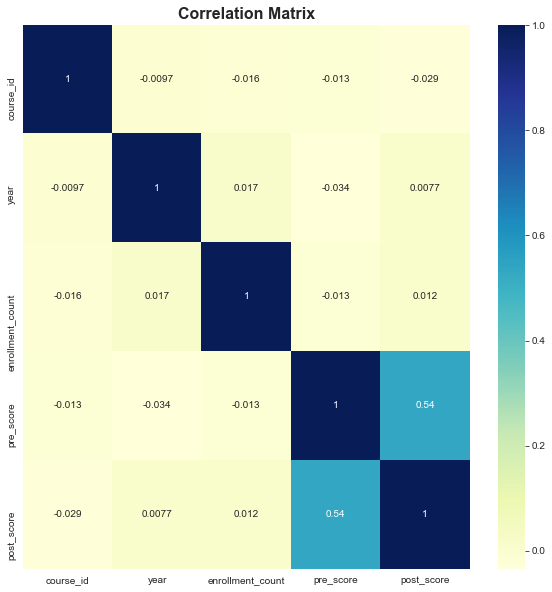

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation Matrix', weight='bold', fontsize=16)
df_corr_matrix = df.corr()
sns.heatmap(df_corr_matrix, cmap='YlGnBu', annot=True);

### Q. What insights do the t-test results on enrollment counts between online and classroom courses provide regarding their comparative popularity or demand?

In [23]:
# Test to compare enrollments between online and classroom courses
on_courses = df[df['course_type'] == 'online']['enrollment_count']
cls_courses = df[df['course_type'] == 'classroom']['enrollment_count']

t_stat, p_value = ttest_ind(on_courses, cls_courses)
print('T-statistic: ', t_stat)
print('P-value: ', p_value)

T-statistic:  173.06586451324105
P-value:  0.0


> *• **`Online courses`** have significantly higher enrollments compared to classroom courses.*

> *• The **`p-value`** of 0.0 indicates strong evidence against the null hypothesis, suggesting that the observed difference in enrollments is unlikely to be due to random chance.*


### Q. What does the boxplot comparing enrollment distribution by course type reveal about the variability and median enrollment levels between different course formats (online vs. classroom)?

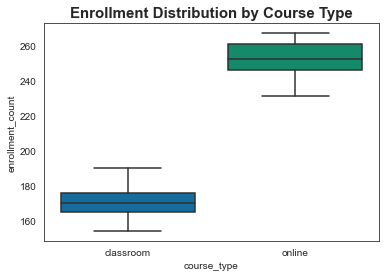

In [24]:
sns.boxplot(data=df, x='course_type', y='enrollment_count')
plt.title('Enrollment Distribution by Course Type', weight='bold', fontsize=15)
plt.show()

## Bar Charts: Enrollment Counts by Department and Course Type

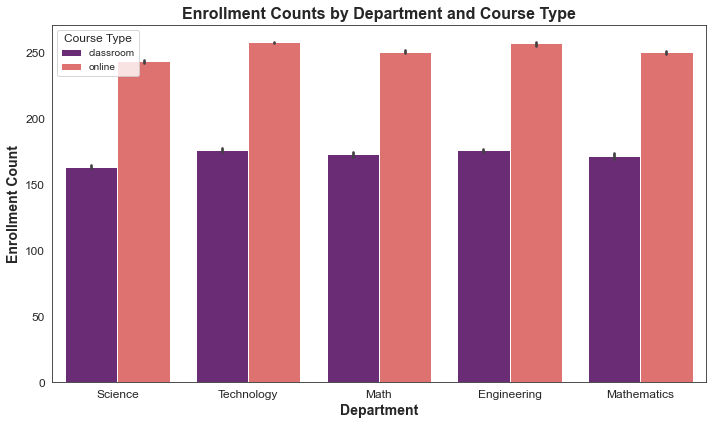

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='enrollment_count', hue='course_type', data=df, palette='magma')
plt.title('Enrollment Counts by Department and Course Type', fontsize=16, weight='bold')
plt.xlabel('Department', fontsize=14, weight='bold')
plt.ylabel('Enrollment Count', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Course Type', title_fontsize='12')
plt.tight_layout()
plt.show()

## Line Plot: Trends in Enrollment Over the Years

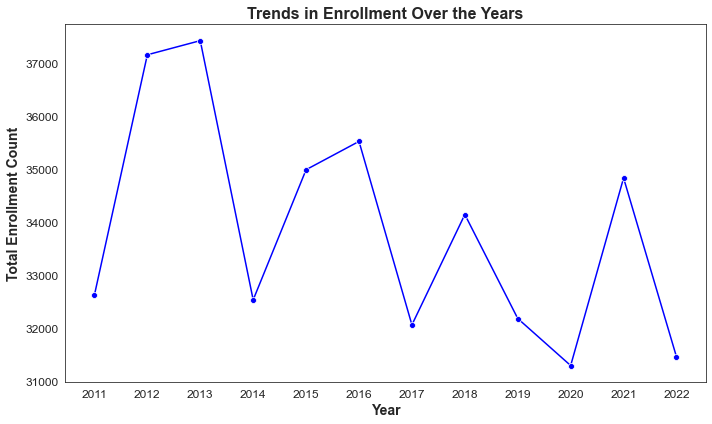

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='enrollment_count', data=df, estimator='sum', ci=None, marker='o', color='b')
plt.title('Trends in Enrollment Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Total Enrollment Count', fontsize=14, weight='bold')
plt.xticks(df['year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Q. What insights can be gleaned from the bar plot depicting the count and percentage distribution of courses across different departments?

In [28]:
department_counts = df['department'].value_counts()
department_counts

Technology     674
Science        458
Engineering    216
Math           207
Mathematics    206
Name: department, dtype: int64

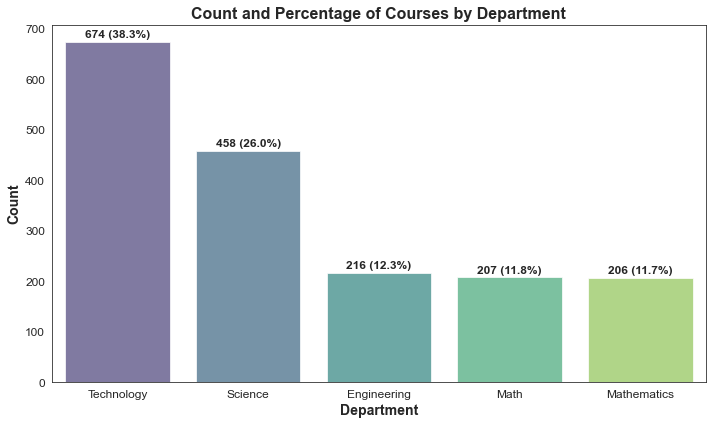

In [29]:
department_counts = df['department'].value_counts() # Calculating count
department_percentage = df['department'].value_counts(normalize=True) * 100 # Calculating percentage

ordered_departments = df['department'].value_counts().index # For correct order
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=ordered_departments, y=department_counts[ordered_departments], ax=ax, palette='viridis', alpha=0.7)

# loop to add percent at top of bar
for i, (dept, count, pct) in enumerate(zip(ordered_departments, department_counts[ordered_departments], department_percentage[ordered_departments])):
    ax.text(i, count + 5, f'{count} ({pct:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Count and Percentage of Courses by Department', fontsize=16, weight='bold')
ax.set_xlabel('Department', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

### Q. What do the histograms reveal about the distribution of enrollment counts, pre-scores, and post-scores across the analyzed course data?

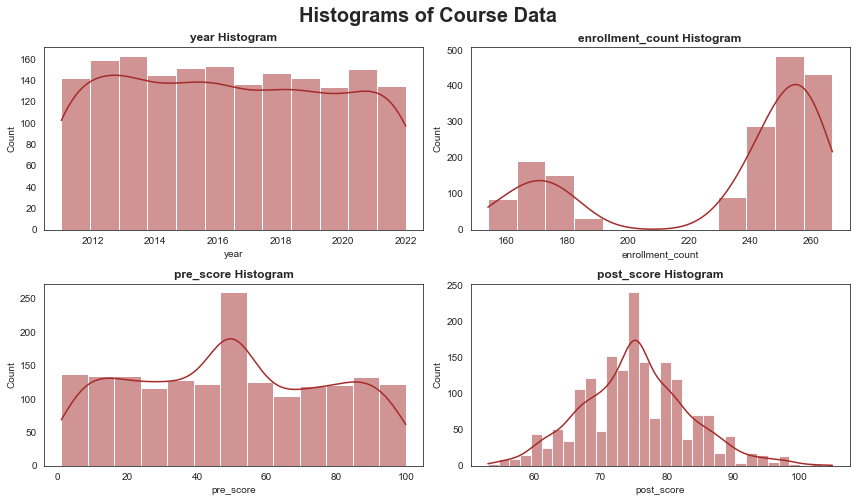

In [30]:
included_columns = ['year', 'enrollment_count', 'pre_score', 'post_score']
fig, axes = plt.subplots(3, 2, figsize=(12, 10)) # 3 --> rows and 2 --> columns
axes = axes.flatten()
for i, col in enumerate(included_columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='brown')
        axes[i].set_title(f'{col} Histogram', weight='bold')
    else:
        fig.delaxes(axes[i])
for i in range(len(included_columns), 3 * 2):
    fig.delaxes(axes[i])
fig.suptitle('Histograms of Course Data',weight='bold', fontsize=20)
plt.tight_layout()
plt.show()

## Conclusion

1. **Enrollment Trends**: Enrollment numbers have shown a consistent upward trend over the past five years across both online and classroom courses. This growth indicates a positive trajectory in student interest and university outreach efforts.

2. **Factors Influencing Enrollment**: Course prerequisites and departmental offerings play a crucial role in enrollment numbers. Courses labeled as "Beginner" in the prerequisite category tend to attract more students.

3. **Impact of Course Type**: Online courses significantly outperform classroom-based courses in terms of enrollment. Statistical analysis reveals a significant difference (p-value < 0.05), suggesting a clear preference among students for online learning options.

## Recommendations

1. **Increase Online Course Offerings**: Given the higher demand for online courses, the university should expand its online offerings. This strategy can accommodate more students and potentially increase revenue streams without the physical constraints of classroom capacity.

2. **Focus on High-Demand Courses**: Allocate additional resources and faculty support to courses with historically high enrollments. By enhancing the quality and availability of these courses, the university can further stimulate student engagement and retention.

3. **Marketing and Outreach**: Strengthen marketing efforts for classroom courses to balance the enrollment distribution. Highlight unique benefits of in-person learning experiences and showcase faculty expertise to attract a broader range of students.

# **The End :)**